In [8]:
import cv2
import json
import requests
import numpy as np
import pandas as pd
from PIL import Image
from io import BytesIO
import urllib.request
import xml.etree.ElementTree as ET

import scipy.io

## Imagem dataset Imagenet

In [10]:
meta_mat = scipy.io.loadmat("devkit-1.0/data/meta.mat")

labels_dic = dict((m[0][1][0], m[0][0][0][0]-1) for m in meta_mat['synsets'])
label_names_dic = dict((m[0][1][0], m[0][2][0]) for m in meta_mat['synsets'])

for label in labels_dic.keys():
    print("{0},{1},{2}".format(label, labels_dic[label], label_names_dic[label]))

n07711080,0,french fries, french-fried potatoes, fries, chips
n07711569,1,mashed potato
n07767549,2,black olive, ripe olive
n03314780,3,face powder
n07739344,4,crab apple, crabapple
n07742313,5,Granny Smith
n07745940,6,strawberry
n07743544,7,blueberry
n07743902,8,cranberry
n07744246,9,currant
n07744811,10,blackberry
n07745466,11,raspberry
n07746186,12,persimmon
n07767171,13,mulberry
n07747607,14,orange
n07749446,15,kumquat
n07749582,16,lemon
n07749969,17,grapefruit
n07751451,18,plum
n07753113,19,fig
n07753275,20,pineapple, ananas
n07753592,21,banana
n07754684,22,jackfruit, jak, jack
n07757132,23,cherry
n07758680,24,grape
n07760859,25,custard apple
n07762913,26,durian
n07764155,27,mango
n07765208,28,elderberry
n07765361,29,guava
n07766173,30,litchi, litchi nut, litchee, lichi, leechee, lichee, lychee
n07768694,31,pomegranate
n07769584,32,quince
n07727048,33,kidney bean
n07729485,34,soy, soybean, soya, soya bean
n07725531,35,green pea, garden pea
n07726095,36,chickpea, garbanzo
n07720277

n07721325,1035,hot pepper
n07721456,1036,chili, chili pepper, chilli, chilly, chile
n07734017,1037,tomato
n07710283,1038,root vegetable
n07713395,1039,cruciferous vegetable
n07713895,1040,cabbage, chou
n07715561,1041,squash
n07715721,1042,summer squash
n07717070,1043,winter squash
n07722217,1044,onion
n00007347,1045,causal agent, cause, causal agency
n00002684,1046,object, physical object
n09287968,1047,geological formation, formation
n09366017,1048,natural depression, depression
n09259219,1049,crater
n09366317,1050,natural elevation, elevation
n09359803,1051,mountain, mount
n09409512,1052,ridge
n09214060,1053,bar
n09406793,1054,reef
n09433442,1055,shore
n09443453,1056,spring, fountain, outflow, outpouring, natural spring
n00027167,1057,location
n08620061,1058,point
n08578706,1059,geographic point, geographical point
n04602044,1060,workplace, work
n00003553,1061,whole, unit
n00019128,1062,natural object
n09349797,1063,mechanism
n09214581,1064,barrier
n13086908,1065,plant part, plant st

In [43]:
def load_image_with_bounding_boxes(image_path, wnid, image_id):
    
    img = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    
    bbox_path = 'annotations/' + wnid + '/' + wnid + "_" + image_id + '.xml'
    
    tree = ET.parse(bbox_path)
    root = tree.getroot()
    bbox = root.findall("object")[0].findall("bndbox")[0]

    xmin = int(bbox[0].text)
    ymin = int(bbox[1].text)
    xmax = int(bbox[2].text)
    ymax = int(bbox[3].text)

    img = cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)
    
    if wnid in labels_dic:
        text = "{0},{1},{2}".format(wnid, labels_dic[wnid], label_names_dic[wnid])
        cv2.putText(img,text,(10,50), cv2.FONT_HERSHEY_SIMPLEX, 1,(0,255,0),2,cv2.LINE_AA)
        #print("{0},{1},{2}".format(wnid, labels_dic[wnid], label_names_dic[wnid]))
        
    return Image.fromarray(img)

In [11]:
annotations =  scipy.io.loadmat('annotations/attrann.mat')

bboxes = annotations['attrann']['bboxes']
images = annotations['attrann']['images']
attributes = annotations['attrann']['attributes']
labels = annotations['attrann']['labels']


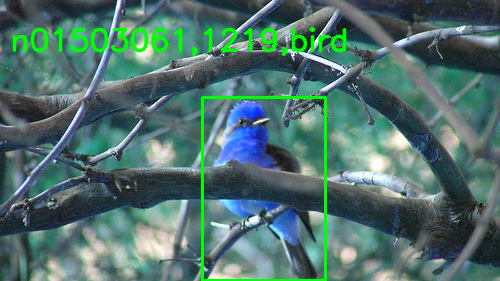

In [44]:
load_image_with_bounding_boxes("images/281890778_1e165563f6.jpg", "n01503061", "21376")

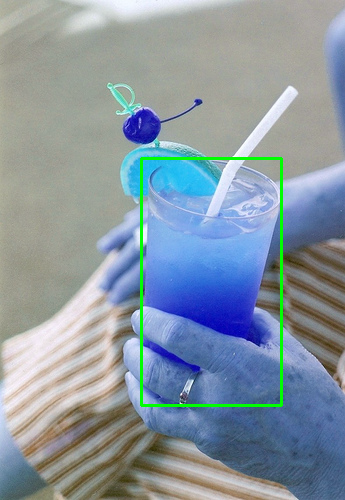

In [13]:
load_image_with_bounding_boxes("images/362520394_8dbef23d2b.jpg", "n07881800", "26165")

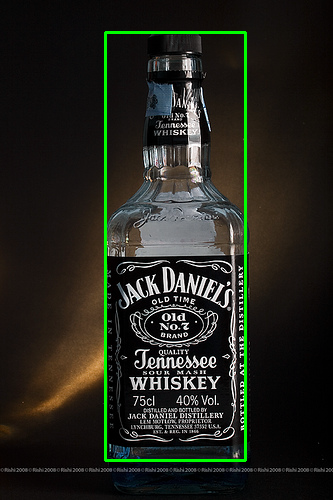

In [18]:
load_image_with_bounding_boxes("images/2784349852_32b44b6523.jpg", "n07881800", "25793")